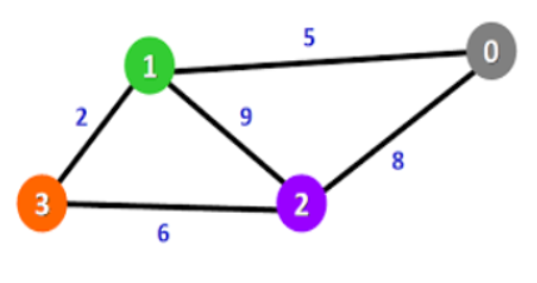

In [2]:
import heapq

def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    parent = {start: None}
    pq = [(0, start)]

    while pq:
        dist, node = heapq.heappop(pq)
        if node == end:
            path = []
            while node is not None:
                path.append(node)
                node = parent[node]
            return path[::-1], dist
        for neighbor, weight in graph[node]:
            new_dist = dist + weight
            if new_dist < distances[neighbor]:
                distances[neighbor] = new_dist
                parent[neighbor] = node
                heapq.heappush(pq, (new_dist, neighbor))
    return None, float('inf')

graph2 = {
    0: [(1,5),(2,8)],
    1: [(0,5),(2,9),(3,2)],
    2: [(0,8),(1,9),(3,6)],
    3: [(1,2),(2,6)]
}

path, dist = dijkstra(graph2, 0, 3)
print(f"Shortest path : {path} Cost {dist}")

Shortest path : [0, 1, 3] Cost 7


In [3]:
from collections import deque

graph2= {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2]
}

def bfs(graph, start):
    visited = set([start])
    queue = deque([start])
    order = []

    while queue:
        node = queue.popleft()
        order.append(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    return order

print("BFS Traversal from node '0':", bfs(graph2, 0))

BFS Traversal from node '0': [0, 1, 2, 3]


In [4]:
graph2 = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2]
}

def dfs(graph, node, visited=None, order=None):
    if visited is None:
        visited = set()
    if order is None:
        order = []
    visited.add(node)
    order.append(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited, order)
    return order

print("DFS Traversal from node 0:", dfs(graph2, 0))

DFS Traversal from node 0: [0, 1, 2, 3]


In [5]:
graph2= {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2]
}
def detect_cycle(graph):
    visited = set()

    def dfs_cycle(node, parent):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                if dfs_cycle(neighbor, node):
                    return True
            elif neighbor != parent:
                print(f"Cycle detected between {node} and {neighbor}")
                return True
        return False

    for node in graph:
        if node not in visited:
            if dfs_cycle(node, None):
                return
    print("No cycle detected.")

detect_cycle(graph2)

Cycle detected between 2 and 0


In [6]:
def is_safe(node, color, color_assign, graph):
    return all(color_assign.get(neigh) != color for neigh in graph[node])

def color_graph(graph, nodes, colors, idx=0, color_assign={}):
    if idx == len(nodes):
        return color_assign
    node = nodes[idx]
    for color in colors:
        if is_safe(node, color, color_assign, graph):
            color_assign[node] = color
            result = color_graph(graph, nodes, colors, idx+1, color_assign)
            if result:
                return result
            color_assign[node] = None
    return None

graph2 = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2]
}

colors_for_graph2 = ['Yellow', 'Orange', 'Purple']
nodes_graph2 = [0, 1, 2, 3]
coloring_result = color_graph(graph2, nodes_graph2, colors_for_graph2)

print("Graph 2 Node Coloring with different colors:")
for node, color in coloring_result.items():
    print(f"Node {node} -> {color}")

Graph 2 Node Coloring with different colors:
Node 0 -> Yellow
Node 1 -> Orange
Node 2 -> Purple
Node 3 -> Yellow
